In [1]:
#Helpers libraries
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Helpers fucntions

def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

In [14]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "/Users/seangolbad/tennislytics" #Change it depending on where you want to store the files
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2021)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2021)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

In [15]:
df_atp.to_csv("df_atp.csv")
df_wta.to_csv("df_wta.csv")

In [16]:
df_atp

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55664,19,New York,US Open,2020-09-09,Grand Slam,Outdoor,Hard,Quarterfinals,5,Medvedev D.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.33,4.44,1.25,3.98
55665,19,New York,US Open,2020-09-10,Grand Slam,Outdoor,Hard,Quarterfinals,5,Thiem D.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.22,5.54,1.18,5.04
55666,19,New York,US Open,2020-09-11,Grand Slam,Outdoor,Hard,Semifinals,5,Zverev A.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.39,3.50,1.35,3.28
55667,19,New York,US Open,2020-09-12,Grand Slam,Outdoor,Hard,Semifinals,5,Thiem D.,...,NaN,NaN,NaN,NaN,NaN,NaN,2.04,1.95,1.98,1.86


In [17]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55669 entries, 0 to 55668
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         55669 non-null  int64         
 1   Location    55669 non-null  object        
 2   Tournament  55669 non-null  object        
 3   Date        55669 non-null  datetime64[ns]
 4   Series      55669 non-null  object        
 5   Court       55669 non-null  object        
 6   Surface     55669 non-null  object        
 7   Round       55669 non-null  object        
 8   Best of     55669 non-null  int64         
 9   Winner      55669 non-null  object        
 10  Loser       55669 non-null  object        
 11  WRank       55649 non-null  object        
 12  LRank       55573 non-null  object        
 13  W1          55381 non-null  float64       
 14  L1          55383 non-null  float64       
 15  W2          54854 non-null  object        
 16  L2          54855 non-

In [18]:
df_atp.describe()

,ATP,Best of,W1,L1,W4,L4,W5,L5,Wsets,CBW,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
count,55669.000000,55669.000000,55381.000000,55383.000000,5121.000000,5121.000000,1941.000000,1941.00000,55420.000000,17506.000000,...,10671.000000,10671.000000,28131.000000,28142.000000,15572.000000,15579.000000,26115.000000,26115.000000,26115.000000,26115.000000
mean,32.914764,3.377158,5.795833,4.065526,5.779926,3.876391,6.617723,3.75219,2.145254,1.812080,...,1.815867,3.542479,1.810226,3.451461,1.796538,3.557943,1.996720,7.739856,1.837357,3.543333
std,18.198979,0.782355,1.238019,1.843979,1.271608,1.895449,2.222466,2.75810,0.460158,0.868254,...,0.996238,3.646316,1.031691,3.075889,1.004273,3.272510,1.570202,370.725799,1.083915,3.228289
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,1.010000,1.020000,1.000000,1.000000,1.000000,1.010000,1.010000,1.010000,1.010000,1.010000
25%,19.000000,3.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.00000,2.000000,1.280000,...,1.240000,1.750000,1.250000,1.730000,1.220000,1.730000,1.300000,1.840000,1.250000,1.740000
50%,33.000000,3.000000,6.000000,4.000000,6.000000,4.000000,6.000000,3.00000,2.000000,1.550000,...,1.500000,2.500000,1.500000,2.500000,1.500000,2.630000,1.590000,2.750000,1.510000,2.520000
75%,49.000000,3.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.00000,2.000000,2.050000,...,2.030000,3.850000,2.000000,4.000000,2.000000,4.000000,2.210000,4.450000,2.070000,3.900000
max,69.000000,5.000000,7.000000,7.000000,7.000000,7.000000,70.000000,68.00000,3.000000,14.000000,...,18.000000,60.000000,26.000000,51.000000,19.000000,81.000000,76.000000,42586.000000,23.450000,36.440000


In [20]:
df_atp = pd.read_csv('df_atp.csv')

In [21]:
# installing package
!pip install pandas-profiling

     |████████████████████████████████| 324 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 352 kB 26.4 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 21.8 MB/s eta 0:00:01     |██████▏                         | 1.9 MB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 50.0 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 86.6 MB/s eta 0:00:01
     |████████████████████████████████| 161 kB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 652 kB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 10.8 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d58a6164efe7d3b1c5d9684b27125f6b3b3d6d4f4bfd0b56db75e34beea5c917
  Stored in directory: /Users/seangolbad/Library/Caches/pip/wheels/1d/05/04/c6d7d3b66539d9e

In [22]:
#importing library

from pandas_profiling import ProfileReport
#defining the library
profile = ProfileReport(df_atp)
# exporting your report as a html file
profile.to_file(output_file='report_atp.html')

INFO:visions.backends:Pandas backend loaded 1.3.4
INFO:visions.backends:Numpy backend loaded 1.20.3
INFO:visions.backends:Pyspark backend NOT loaded
INFO:visions.backends:Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
pip install dtale

     |████████████████████████████████| 14.0 MB 2.1 MB/s eta 0:00:01    |██████████████████████          | 9.7 MB 2.1 MB/s eta 0:00:03
     |████████████████████████████████| 85.2 MB 23.1 MB/s eta 0:00:01
     |████████████████████████████████| 994 kB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 642 kB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 254 kB 25.3 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 15.5 MB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 31.6 MB/s eta 0:00:01
     |████████████████████████████████| 421 kB 30.8 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 24.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████

In [25]:
import dtale 

import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(df_atp)

In [27]:
!pip install sweetviz
#importing sweetviz and visualizing our data
import sweetviz as sv
sweet_report = sv.analyze(df_atp)
sweet_report.show_html('sweetviz_report_atp.html')

     |████████████████████████████████| 15.1 MB 2.5 MB/s eta 0:00:01


                                             |      | [  0%]   00:00 -> (? left)

TypeError: 

Column [WRank] has a 'mixed' inferred_type (as determined by Pandas).
This is is not currently supported; column types should not contain mixed data.
e.g. only floats or strings, but not a combination.

POSSIBLE RESOLUTIONS:
BEST -> Make sure series [WRank] only contains a certain type of data (numerical OR string).
OR -> Convert series [WRank] to a string (if makes sense) so it will be picked up as CATEGORICAL or TEXT.
     One way to do this is:
     df['WRank'] = df['WRank'].astype(str)
OR -> Convert series [WRank] to a numerical value (if makes sense):
     One way to do this is:
     df['WRank'] = pd.to_numeric(df['WRank'], errors='coerce')
     # (errors='coerce' will transform string values to NaN, that can then be replaced if desired; consult Pandas manual pages for more details)


In [31]:
import sweetviz as sv

In [32]:
sweet_report = sv.analyze(df_atp)

                                             |      | [  0%]   00:00 -> (? left)

TypeError: 

Column [WRank] has a 'mixed' inferred_type (as determined by Pandas).
This is is not currently supported; column types should not contain mixed data.
e.g. only floats or strings, but not a combination.

POSSIBLE RESOLUTIONS:
BEST -> Make sure series [WRank] only contains a certain type of data (numerical OR string).
OR -> Convert series [WRank] to a string (if makes sense) so it will be picked up as CATEGORICAL or TEXT.
     One way to do this is:
     df['WRank'] = df['WRank'].astype(str)
OR -> Convert series [WRank] to a numerical value (if makes sense):
     One way to do this is:
     df['WRank'] = pd.to_numeric(df['WRank'], errors='coerce')
     # (errors='coerce' will transform string values to NaN, that can then be replaced if desired; consult Pandas manual pages for more details)


2023-06-21 08:26:37,818 - INFO     - Executing shutdown due to inactivity...
2023-06-21 08:26:38,238 - INFO     - Executing shutdown...


In [ ]:
pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
#you have to specify the target variable
dft = AV.AutoViz('train (3).csv', depVar = 'Survived')

In [33]:
df_atp.shape

(55669, 55)

In [34]:
df_atp.head()

,Unnamed: 0,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_atp.corr()

,Unnamed: 0,ATP,Best of,W1,L1,W4,L4,W5,L5,Wsets,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
Unnamed: 0,1.000000,0.004682,0.022305,0.009469,0.027613,0.008046,-0.010501,0.010561,0.016350,0.023518,...,0.001726,0.018345,0.027224,-0.005748,0.020202,0.006997,0.000162,0.001310,0.019928,-0.059839
ATP,0.004682,1.000000,-0.047136,0.007545,0.018920,-0.014694,0.010084,-0.020757,0.014256,-0.043260,...,-0.000204,-0.007469,0.018865,-0.031693,0.023766,-0.046861,0.010067,0.005426,0.014391,-0.032863
Best of,0.022305,-0.047136,1.000000,-0.019028,0.005554,0.032041,-0.010406,0.027973,0.012396,0.826061,...,-0.058090,0.200847,-0.041084,0.246198,-0.045492,0.224064,-0.018614,0.021575,-0.036981,0.259161
W1,0.009469,0.007545,-0.019028,1.000000,-0.186254,-0.026559,0.034653,0.039283,0.034520,0.038874,...,-0.095076,0.075095,-0.059553,0.059667,-0.059227,0.063183,-0.047721,0.002174,-0.058989,0.056243
L1,0.027613,0.018920,0.005554,-0.186254,1.000000,0.041053,-0.011206,-0.001302,0.004352,0.041960,...,0.137757,-0.139683,0.123627,-0.169662,0.118840,-0.172011,0.103832,-0.005599,0.120135,-0.175414
W4,0.008046,-0.014694,0.032041,-0.026559,0.041053,1.000000,-0.145885,0.020097,0.006750,0.203597,...,-0.002749,0.087049,-0.044076,0.085983,-0.075667,0.108087,-0.042637,0.003727,-0.048453,0.073006
L4,-0.010501,0.010084,-0.010406,0.034653,-0.011206,-0.145885,1.000000,0.043553,0.062985,0.150872,...,0.072402,-0.170659,0.084681,-0.121842,0.115457,-0.151222,0.082428,0.000806,0.090466,-0.121066
W5,0.010561,-0.020757,0.027973,0.039283,-0.001302,0.020097,0.043553,1.000000,0.897605,0.198930,...,-0.044391,0.061122,0.017701,-0.035464,0.016827,-0.049089,0.011697,-0.008603,0.021008,-0.053157
L5,0.016350,0.014256,0.012396,0.034520,0.004352,0.006750,0.062985,0.897605,1.000000,0.120754,...,0.004613,-0.002883,0.052326,-0.062129,0.049087,-0.082122,0.039666,-0.008907,0.054835,-0.077514
Wsets,0.023518,-0.043260,0.826061,0.038874,0.041960,0.203597,0.150872,0.198930,0.120754,1.000000,...,-0.089032,0.186912,-0.070684,0.227453,-0.075337,0.209170,-0.046429,0.019607,-0.067691,0.240413


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

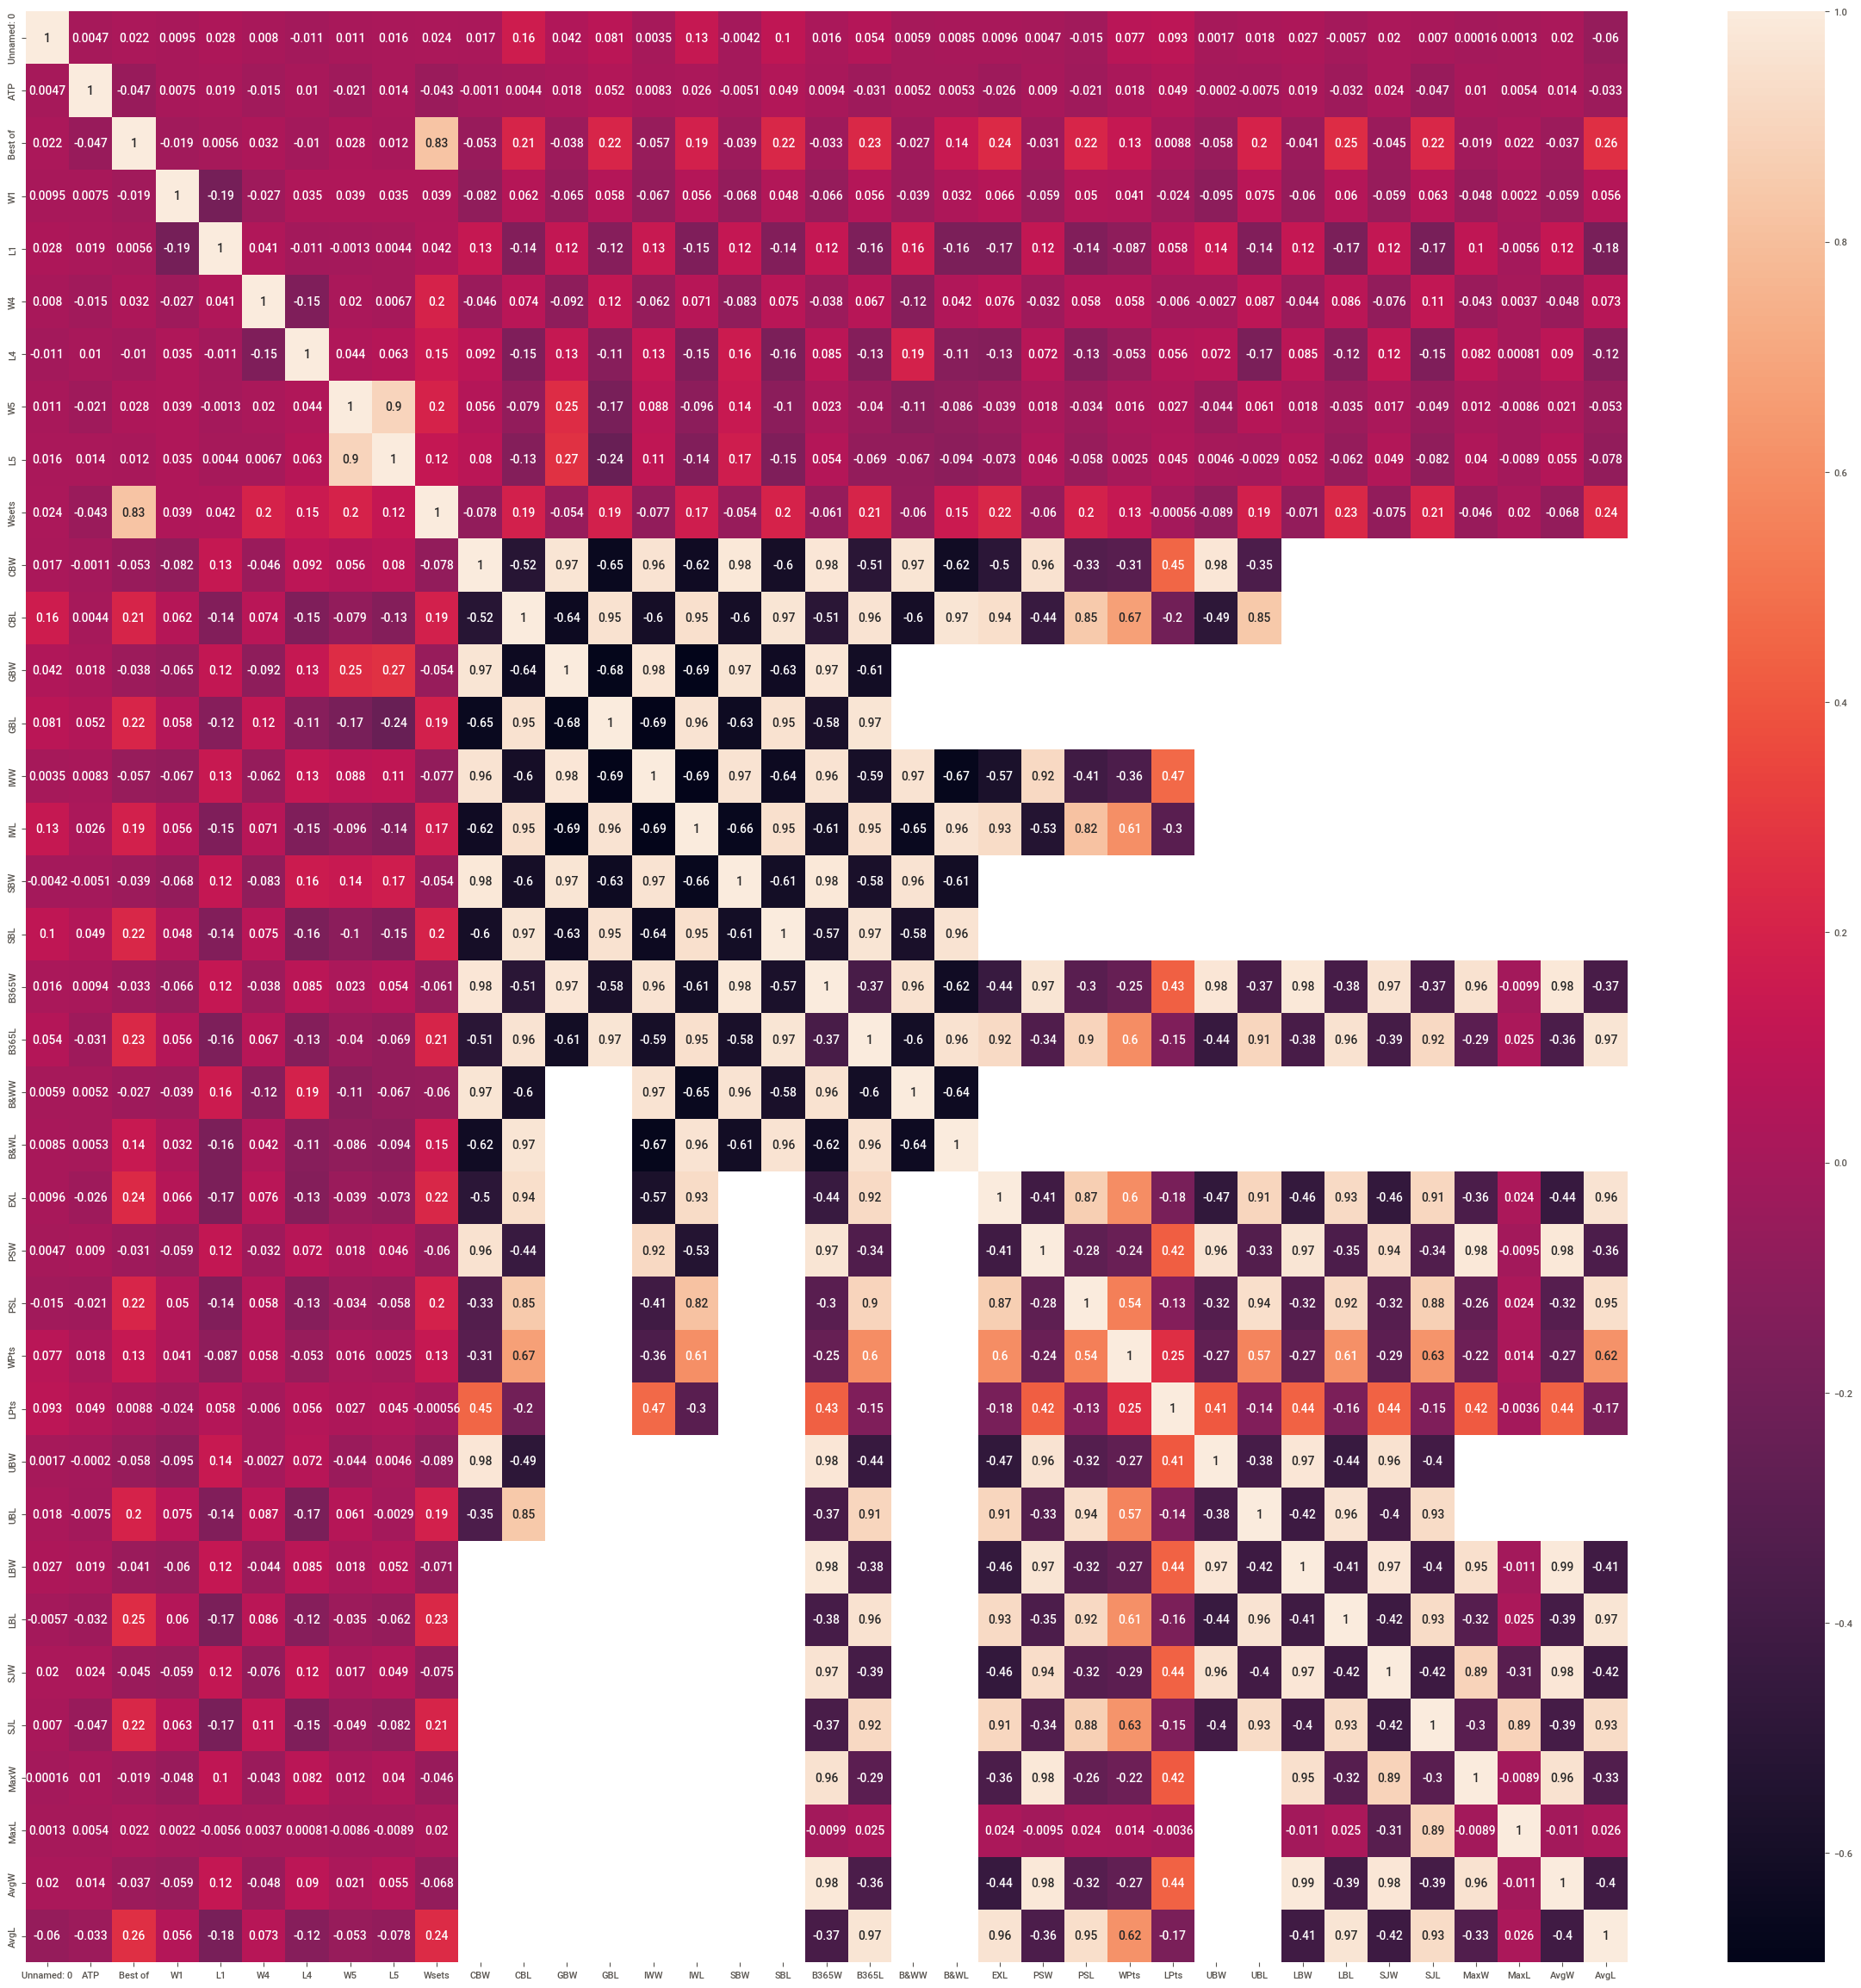

In [48]:
plt.figure(figsize=(30,30))
sns.heatmap(df_atp.corr(),annot=True)
plt.show()

In [39]:
threshold = 0.4

df_atp_corr = df_atp.corr()
df_atp_corr = df_atp_corr.iloc[20,:-1]
golden_features_list = df_atp_corr[abs(df_atp_corr) >= threshold].sort_values(ascending=False)

In [40]:
golden_features_list

B&WW     1.000000
CBW      0.973161
IWW      0.965516
SBW      0.962369
B365W    0.958188
SBL     -0.580910
CBL     -0.597296
B365L   -0.604375
B&WL    -0.635003
IWL     -0.654124
Name: B&WW, dtype: float64

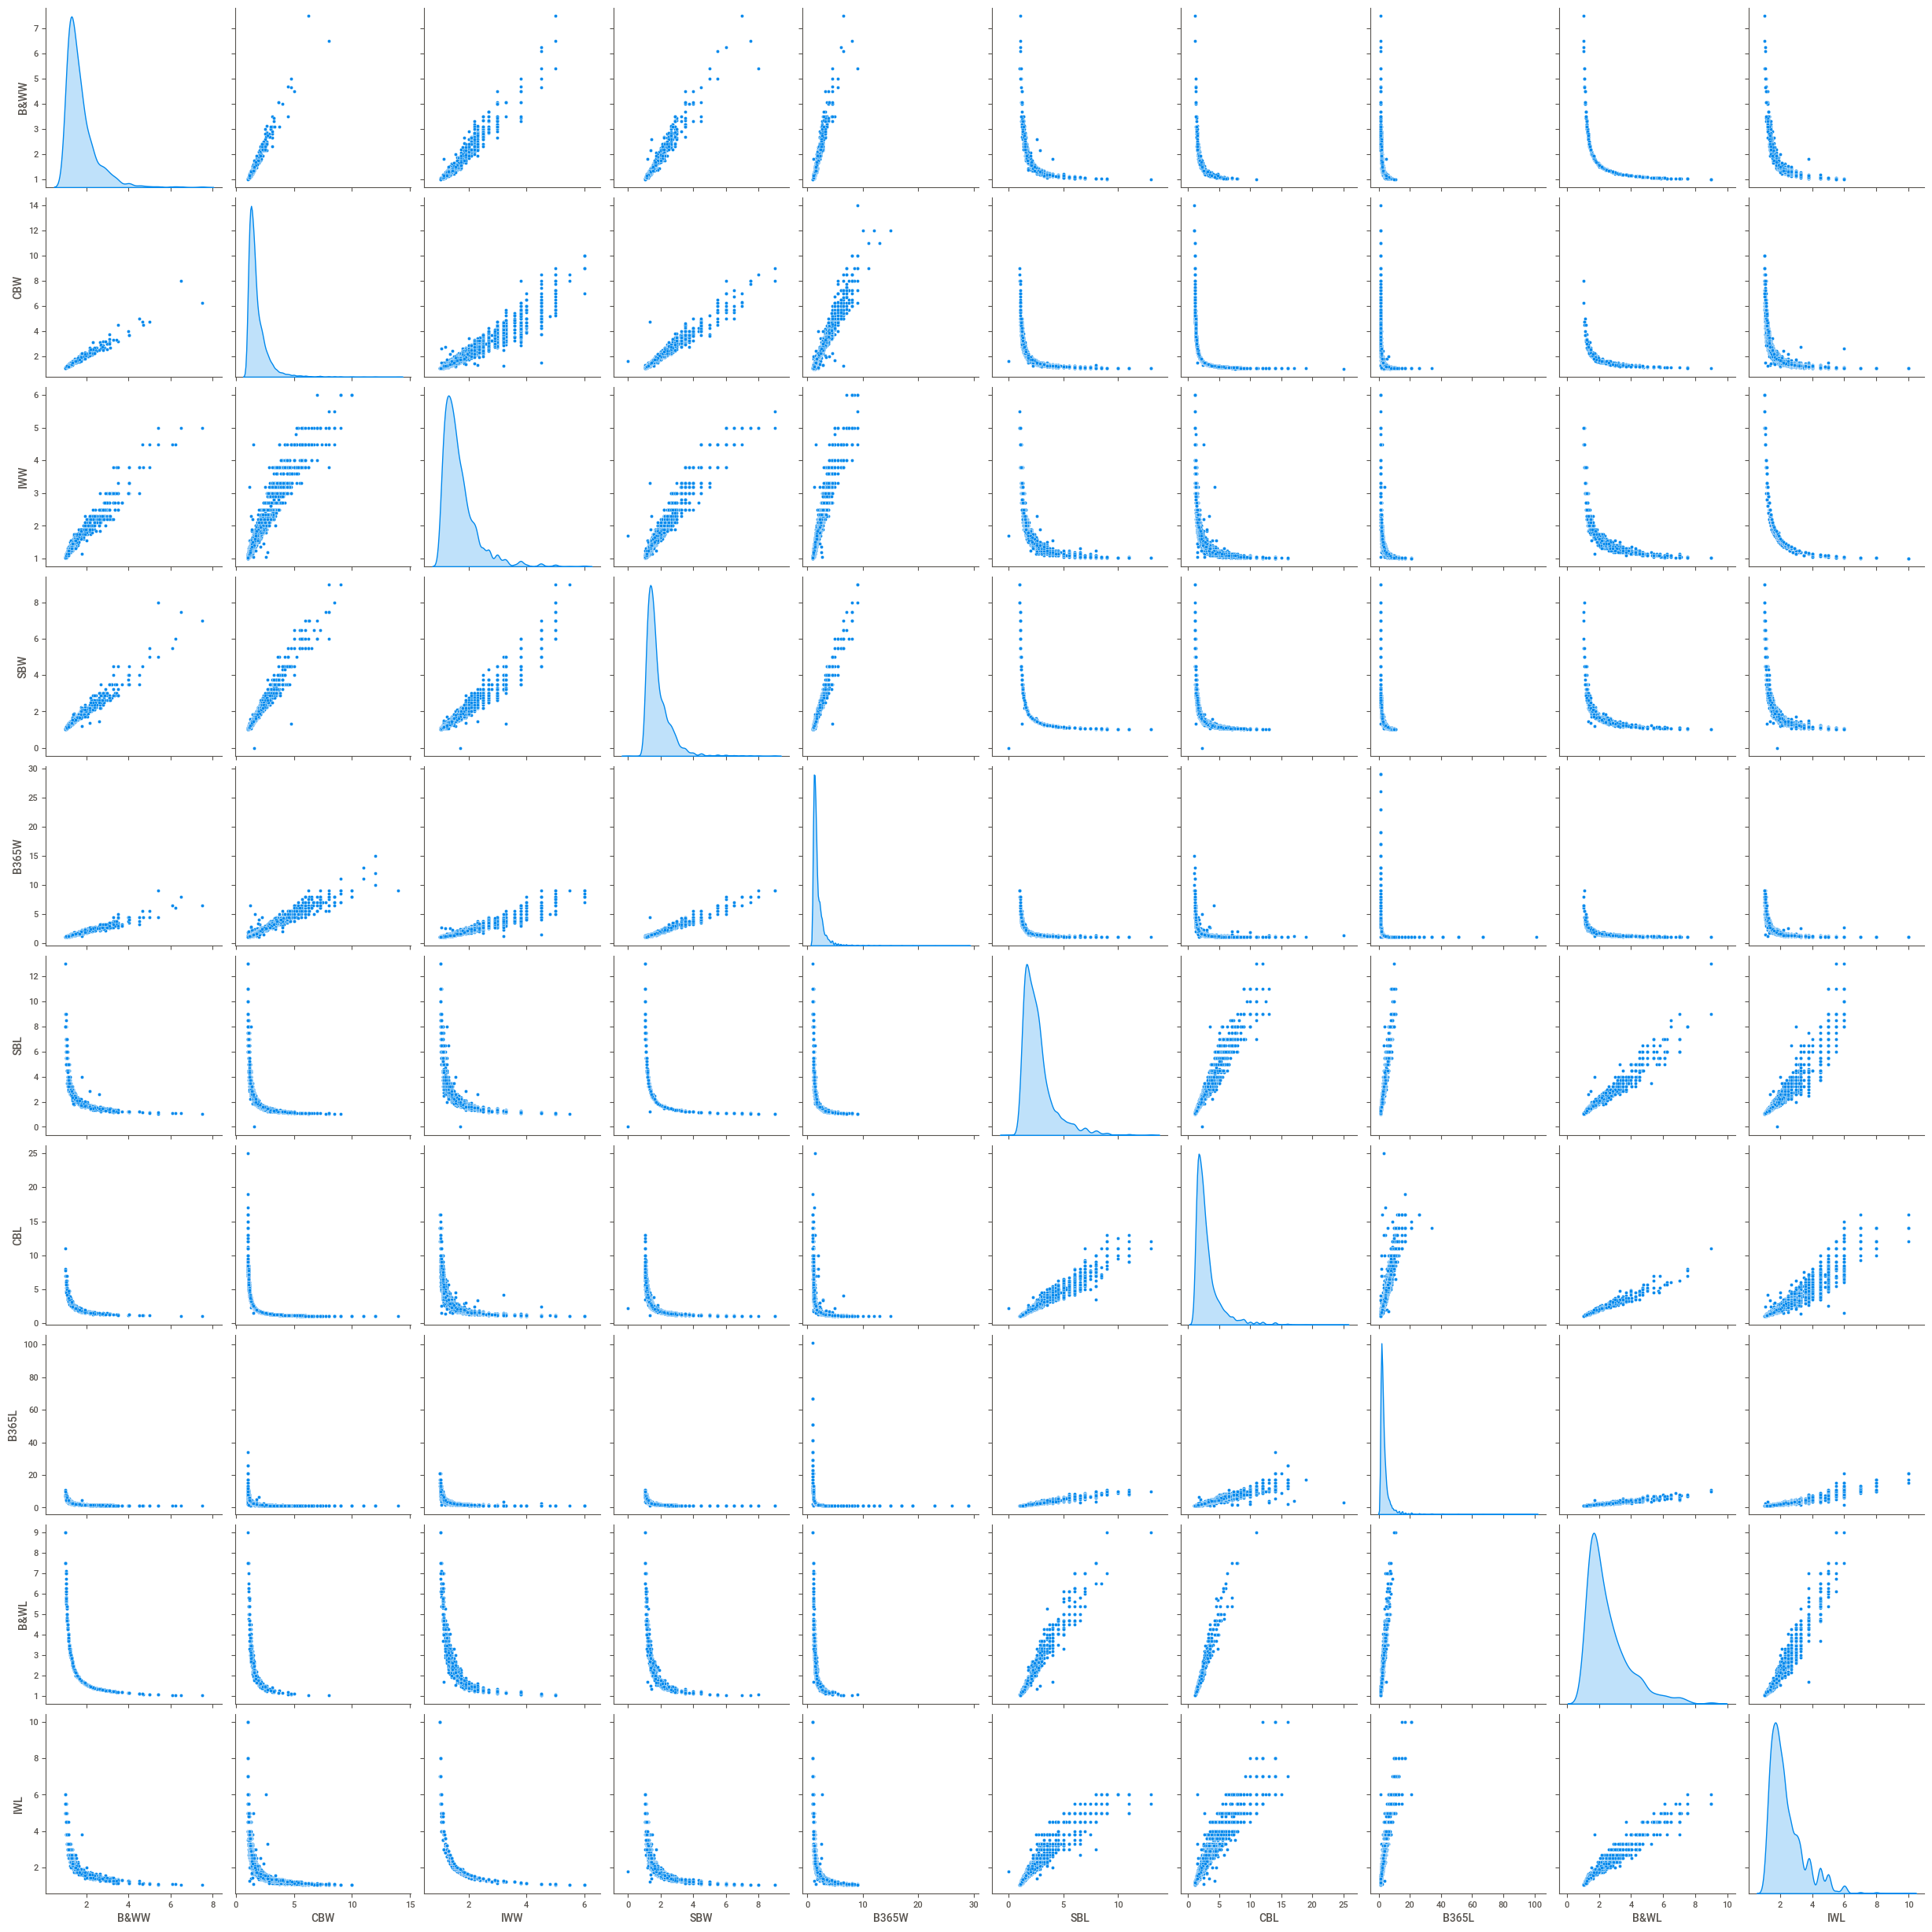

In [43]:
sns.pairplot(df_atp[golden_features_list.index],diag_kind='kde')
plt.show()

In [63]:
df_atp.isnull().sum()

Unnamed: 0        0
ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank            20
LRank            96
W1              288
L1              286
W2              815
L2              814
W3            29810
L3            29811
W4            50548
L4            50548
W5            53728
L5            53728
Wsets           249
Lsets           250
Comment           0
CBW           38163
CBL           38163
GBW           50614
GBL           50614
IWW           42311
IWL           42311
SBW           50245
SBL           50245
B365W          8672
B365L          8649
B&WW          54572
B&WL          54572
EXW           16258
EXL           16253
PSW           14976
PSL           14976
WPts          16208
LPts          16281
UBW           44998
UBL           44998
LBW           27538
LBL           27527
SJW           40097


In [93]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

def predict_match_winner(data):
  """Predicts the winner of a match based on the data.

  Args:
    data: A Pandas DataFrame containing the data for the match.

  Returns:
    The predicted winner of the match.
  """

  # Create the features for the model.
  features = data[["B365W", "B365L"]]

  # Create the model.
  model = LogisticRegression()

  # Train the model.
  model.fit(features, data["Winner"])

  # Predict the winner of the match.
  prediction = model.predict(features)

  return prediction

if __name__ == "__main__":
  # Load the data.
  data = pd.read_csv("df_atp.csv")
  data = data.dropna(subset=["B365W", "B365L"])

  # Predict the winner of the match.
  prediction = predict_match_winner(data)

  # Print the prediction.
  print("The predicted winner of the match is:", prediction)

The predicted winner of the match is: ['Federer R.' 'Verdasco F.' 'Lopez F.' ... 'Ferrer D.' 'Lopez F.'
 'Federer R.']


In [83]:
prediction.shape

(46997,)

In [97]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def evaluate_model(data, model):
  """Evaluates the performance of the model on the data.

  Args:
    data: A Pandas DataFrame containing the data for the match.
    model: The model to be evaluated.

  Returns:
    The accuracy of the model.
  """

  # Create the features for the model.
  features = data[["B365W", "B365L", "WRank", "LRank"]]

  # Predict the winner of the match.
  predictions = model.predict(features)

  # Calculate the accuracy of the model.
  accuracy = accuracy_score(data["Winner"], predictions)

  return accuracy

if __name__ == "__main__":
  # Load the data.
  data = pd.read_csv("df_atp.csv")
  data = data.dropna(subset=["B365W", "B365L", "WRank", "LRank"])
  features = data[["B365W", "B365L", "WRank", "LRank"]]

  # Create the model.
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

  # Train the model.
  model.fit(features, data["Winner"])

  # Evaluate the model.
  accuracy = evaluate_model(data, model)

  # Print the accuracy.
  print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 0.03006845371377391


In [64]:
def compute_elo_rankings(data):
    """
    Given the list on matches in chronological order, for each match, computes 
    the elo ranking of the 2 players at the beginning of the match
    
    """
    print("Elo rankings computing...")
    players=list(pd.Series(list(data.Winner)+list(data.Loser)).value_counts().index)
    elo=pd.Series(np.ones(len(players))*1500,index=players)
    ranking_elo=[(1500,1500)]
    for i in range(1,len(data)):
        w=data.iloc[i-1,:].Winner
        l=data.iloc[i-1,:].Loser
        elow=elo[w]
        elol=elo[l]
        pwin=1 / (1 + 10 ** ((elol - elow) / 400))    
        K_win=32
        K_los=32
        new_elow=elow+K_win*(1-pwin)
        new_elol=elol-K_los*(1-pwin)
        elo[w]=new_elow
        elo[l]=new_elol
        ranking_elo.append((elo[data.iloc[i,:].Winner],elo[data.iloc[i,:].Loser])) 
        if i%5000==0:
            print(str(i)+" matches computed...")
    ranking_elo=pd.DataFrame(ranking_elo,columns=["elo_winner","elo_loser"])    
    ranking_elo["proba_elo"]=1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / 400))   
    return ranking_elo

In [66]:
compute_elo_rankings(df_atp)

Elo rankings computing...
5000 matches computed...
10000 matches computed...
15000 matches computed...
20000 matches computed...
25000 matches computed...
30000 matches computed...
35000 matches computed...
40000 matches computed...
45000 matches computed...
50000 matches computed...
55000 matches computed...


,elo_winner,elo_loser,proba_elo
0,1500.000000,1500.000000,0.500000
1,1500.000000,1500.000000,0.500000
2,1500.000000,1500.000000,0.500000
3,1500.000000,1500.000000,0.500000
4,1500.000000,1500.000000,0.500000
...,...,...,...
55664,1952.030856,1892.605259,0.584696
55665,1996.175255,1815.997289,0.738307
55666,1899.338793,1834.751133,0.591893
55667,2004.549430,1965.320585,0.556216
